# <center> Machine Learning project on email spam filter </center>


## Introduction

*__Scope of the project__* :  <br>
    To Build an email spam filter which marks the incoming emails of all employees as spam or non-spam.


*__Objective:__*
<ol>
    <li> To identify a maximum number of spam emails. <b> Implies : Maximum True Positives</b>  ✅ </li>  
    <li> Maximum of 0.2% of all legitimate emails being classified incorrectly <b> Implies : False Positives $<$ 0.2%</b>  ✅ </li>  
    <li> To find what percentage of incoming spam emails will be identifed in the future. ✅ </li>
</ol>

In [ ]:
import scipy.io
import scipy.sparse

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import  confusion_matrix, accuracy_score,  roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load and check the data <a id = "11" text goes here></a>

In [ ]:
dataset = scipy.io.loadmat('/content/drive/MyDrive/emails.mat')
print(type(dataset),"\n")
print("There are ",len(dataset)," elements in the data provided.\n")

#print(dataset["X"])
#print(dataset["Y"])

X = dataset["X"].T
y = dataset["Y"].T

print(X.shape)
print(y.shape)

<class 'dict'> 

There are  5  elements in the data provided.

(10000, 57173)
(10000, 1)


The items X, Y represent the features and labels respectively. <br>
Total number of emails is 10,000. <br>
Total number of words is 57,173. <br>

In [ ]:
pd.DataFrame(X.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,...,57163,57164,57165,57166,57167,57168,57169,57170,57171,57172
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Engineering / EDA <a id = "2" text goes here></a>

### Imbalanced Dataset? / Spam- not spam ratio <a id = "21" text goes here></a>


There are 8030 illegitimate and 1970 legitimate emails in the given dataset
Spam percentage     :  19.7
Not Spam percentage :  80.30000000000001
<class 'numpy.ndarray'>
(10000, 1)


Text(0, 0.5, 'Count')

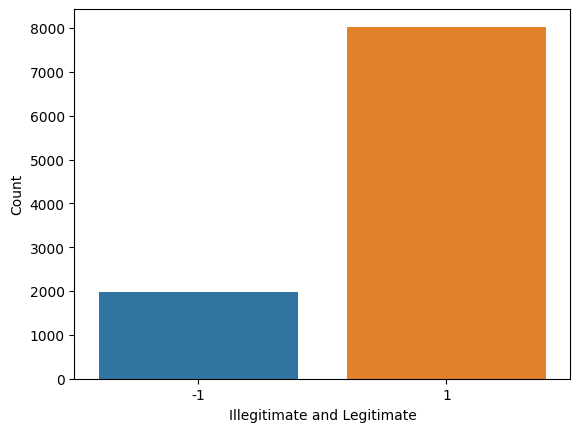

In [ ]:
print("There are",np.count_nonzero(y==1),"illegitimate and", np.count_nonzero(y==-1),"legitimate emails in the given dataset")

print("Spam percentage     : ",(np.count_nonzero(y==-1) / y.shape[0]) * 100)
print("Not Spam percentage : ",(np.count_nonzero(y==1) / y.shape[0]) * 100)

print(type(y))
print(np.shape(y))

c = sns.countplot(x = y.ravel())
c.set_xlabel('Illegitimate and Legitimate')
c.set_ylabel('Count')

<Axes: ylabel='count'>

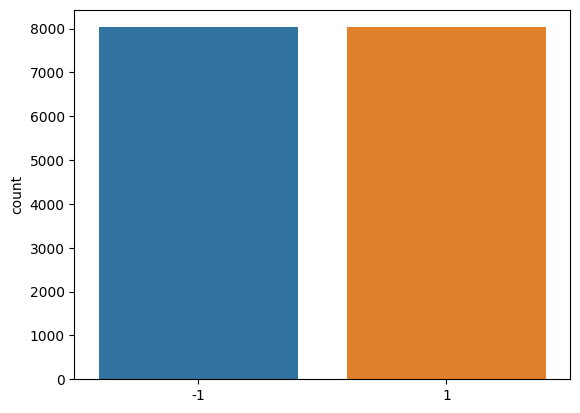

In [ ]:
# To handle imbalanced dataset(80% and 20%)
from imblearn.over_sampling import RandomOverSampler

ros =  RandomOverSampler(random_state= 5) #, ratio=0.5
X_balanced, y_balanced = ros.fit_resample(X, y)

sns.countplot(x = y_balanced.ravel())

## Prediction <a id = "3" text goes here></a>

### Split into training and testing set <a id = "31" text goes here></a>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_balanced, y_balanced, test_size = 0.20, random_state = 5)

### Build the model <a id = "32" text goes here></a>


#### Logistic Regression(Linear Classification)<a id = "321" text goes here></a>


Accuracy of the model is :  99.65 %


Confusion Matrix : 
 [[ 368    5]
 [   2 1625]]

 True Positive Rate :  0.9987707437000615

 False Positive Rate :  0.013404825737265416


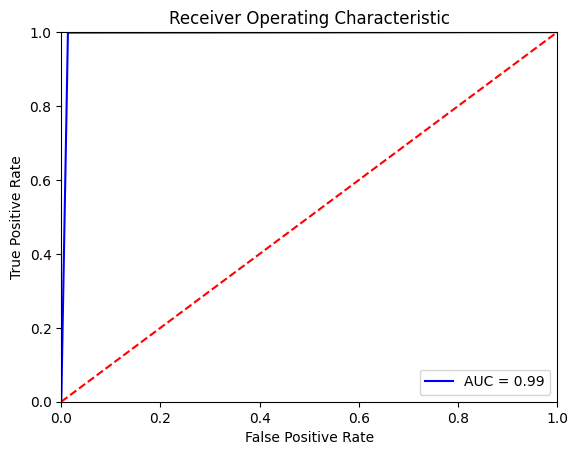

In [ ]:
# 1. Train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)


# 2. Prediction
y_pred = model.predict(X_test)


# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate )
print("\n False Positive Rate : ",false_positive_rate )

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy of the model is :  99.88 %


Confusion Matrix : 
 [[1613    0]
 [   4 1595]]

 True Positive Rate :  0.9974984365228268

 False Positive Rate :  0.0


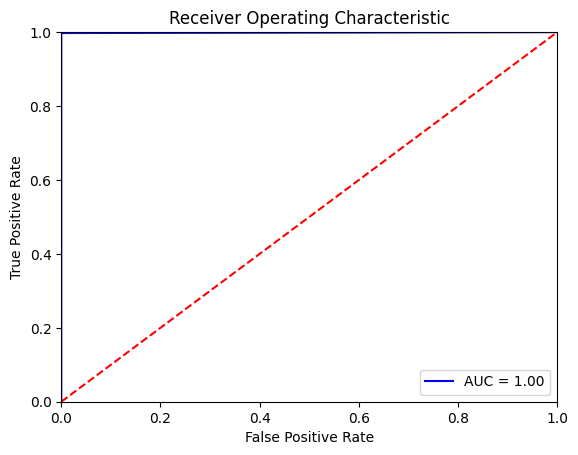

In [ ]:
# Now consider the balanced dataset

# 1. Model building and Training
model = LogisticRegression()
model.fit(X_bal_train,y_bal_train)

# 2. Prediction
y_pred = model.predict(X_bal_test)

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_bal_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_bal_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_bal_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate )
print("\n False Positive Rate : ",false_positive_rate )

fpr, tpr, threshold = roc_curve(y_bal_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Cross validation on actual dataset
from sklearn.model_selection import cross_val_score

print("\n---- Cross validation on actual dataset---\n ")
score = cross_val_score(model, X, y, cv = 10)
print(score)
print("\n Average :",round(score.mean() *100, 2))

# Cross validation on balanced dataset
print("\n---- Cross validation on balanced dataset---\n ")
score = cross_val_score(model, X_balanced, y_balanced, cv = 10)
print(score)
print("\n Average :",round(score.mean() *100, 2))


---- Cross validation on actual dataset---
 
[0.986 0.994 0.993 0.996 0.998 0.997 0.994 0.999 0.992 0.998]

 Average : 99.47

---- Cross validation on balanced dataset---
 
[0.99252802 0.99564134 0.998132   0.99875467 0.99937733 1.
 1.         1.         0.99750934 0.998132  ]

 Average : 99.8


#### Random Forest<a id = "323" text goes here></a>


Accuracy of the model is :  99.65 %


Confusion Matrix : 
 [[ 368    5]
 [   2 1625]]

 True Positive Rate :  0.9987707437000615

 False Positive Rate :  0.013404825737265416


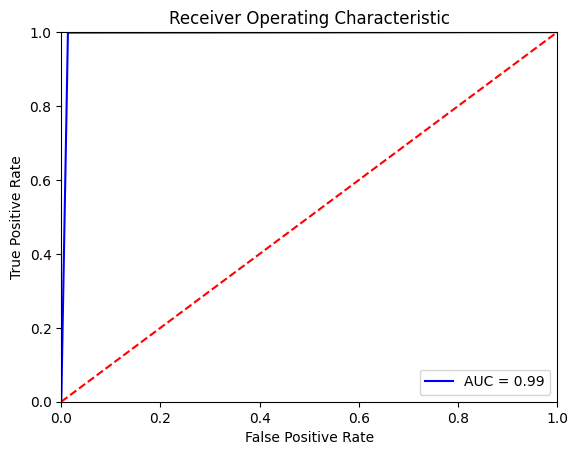

In [ ]:
# 1. Model build and training
from sklearn.ensemble import RandomForestClassifier

model =  RandomForestClassifier()
model.fit(X_train,y_train)

# 2. predict
y_pred = model.predict(X_test)

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate )
print("\n False Positive Rate : ",false_positive_rate )

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
params = { "n_estimators" : [20, 10, 5, 50] ,
            "criterion" : ["entropy", "gini"] }

# Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 5,  scoring = 'roc_auc',  n_jobs = None, verbose = 3, cv =5 )
random_search.fit(X,y)

random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...criterion=gini, n_estimators=50;, score=1.000 total time=   2.2s
[CV 2/5] END ...criterion=gini, n_estimators=50;, score=1.000 total time=   2.1s
[CV 3/5] END ...criterion=gini, n_estimators=50;, score=0.998 total time=   2.2s
[CV 4/5] END ...criterion=gini, n_estimators=50;, score=1.000 total time=   2.6s
[CV 5/5] END ...criterion=gini, n_estimators=50;, score=0.999 total time=   2.4s
[CV 1/5] END criterion=entropy, n_estimators=50;, score=1.000 total time=   2.1s
[CV 2/5] END criterion=entropy, n_estimators=50;, score=1.000 total time=   1.9s
[CV 3/5] END criterion=entropy, n_estimators=50;, score=1.000 total time=   2.1s
[CV 4/5] END criterion=entropy, n_estimators=50;, score=1.000 total time=   2.3s
[CV 5/5] END criterion=entropy, n_estimators=50;, score=0.999 total time=   2.2s
[CV 1/5] END .criterion=entropy, n_estimators=5;, score=0.998 total time=   0.3s
[CV 2/5] END .criterion=entropy, n_estimators=5;,

RandomForestClassifier(criterion='entropy', n_estimators=50)

Accuracy of the model is :  99.65 %


Confusion Matrix : 
 [[ 368    5]
 [   2 1625]]

 True Positive Rate :  0.9987707437000615

 False Positive Rate :  0.013404825737265416


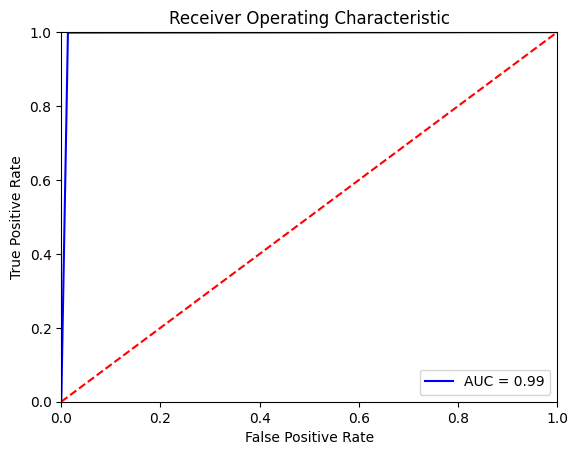

In [ ]:
# New model with tuned hyperparameters and CV
from sklearn.ensemble import RandomForestClassifier

# 1. Model build and train
model =  RandomForestClassifier(n_estimators = 50, criterion = "entropy")
model.fit(X_train,y_train)

# 2. prediction
y_pred = model.predict(X_test)

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate )
print("\n False Positive Rate : ",false_positive_rate )

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Neural Network<a id = "325" text goes here></a>


In [ ]:
# 1. Model build and train
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout            # Hyper parameter

# ANN initialization
model = Sequential()
# Add Input layer and first hidden layer
model.add(Dense(units = 2000, activation = "relu", input_dim = X.shape[1]))
model.add(Dropout(0.3))

# Add second hidden layer
model.add(Dense(units = 1000, activation = "relu"))
model.add(Dropout(0.4))

# Add third hidden layer
model.add(Dense(units = 500, activation = "relu"))
model.add(Dropout(0.2))

# Add fourth hidden layer
model.add(Dense(units = 200,  activation = "relu"))
model.add(Dropout(0.2))

# Add fifth hidden layer
model.add(Dense(units = 100, activation = "relu"))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units = 1,  activation = "sigmoid"))

model.compile(optimizer = "Adamax", loss = "binary_crossentropy" , metrics = ["accuracy"])

#print(type(X_train))
#print(type(X_train.todense()))

#fit ANN to training set
model_history = model.fit(X_train.toarray(), y_train, validation_split = 0.30, batch_size = 1000, epochs = 10)

print(model_history.history.keys())


# 2. Predict
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


# 3. Evaluate
print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")

Epoch 1/10
6/6 [==============================] - 21s 3s/step - loss: -1.4926 - accuracy: 0.5970 - val_loss: -8.7511 - val_accuracy: 0.7271
Epoch 2/10
6/6 [==============================] - 18s 3s/step - loss: -32.2666 - accuracy: 0.6843 - val_loss: -72.6102 - val_accuracy: 0.7362
Epoch 3/10
6/6 [==============================] - 17s 3s/step - loss: -191.1930 - accuracy: 0.7136 - val_loss: -350.1404 - val_accuracy: 0.6833
Epoch 4/10
6/6 [==============================] - 17s 3s/step - loss: -748.4270 - accuracy: 0.6582 - val_loss: -1250.7986 - val_accuracy: 0.7113
Epoch 5/10
6/6 [==============================] - 17s 3s/step - loss: -2523.0864 - accuracy: 0.6941 - val_loss: -3560.8262 - val_accuracy: 0.6900
Epoch 6/10
6/6 [==============================] - 17s 3s/step - loss: -6767.5063 - accuracy: 0.6732 - val_loss: -8979.1826 - val_accuracy: 0.7008
Epoch 7/10
6/6 [==============================] - 17s 3s/step - loss: -16026.9619 - accuracy: 0.7004 - val_loss: -20686.9492 - val_accura

#### Naive Bayes<a id = "326" text goes here></a>

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# 1. Model build and train
model = MultinomialNB()           # create a model
model.fit(X_train,y_train)        # train the model

# 2. Predict
y_pred = model.predict(X_test)    # test the model

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate )
print("\n False Positive Rate : ",false_positive_rate )

Accuracy of the model is :  97.9 %


Confusion Matrix : 
 [[ 372    1]
 [  41 1586]]

 True Positive Rate :  0.97480024585126

 False Positive Rate :  0.002680965147453083


In [ ]:
params = { "alpha" : [0, 0.5 , 1.0] }  # smoothing parameter

# Hyper parameter tuning
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 5,  scoring = 'roc_auc',
                                   n_jobs = None, verbose = 3, cv =5 )
random_search.fit(X,y)

random_search.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...........................alpha=0;, score=0.998 total time=   0.0s
[CV 2/5] END ...........................alpha=0;, score=0.983 total time=   0.0s
[CV 3/5] END ...........................alpha=0;, score=0.997 total time=   0.0s
[CV 4/5] END ...........................alpha=0;, score=0.999 total time=   0.0s
[CV 5/5] END ...........................alpha=0;, score=0.997 total time=   0.0s
[CV 1/5] END .........................alpha=0.5;, score=0.994 total time=   0.0s
[CV 2/5] END .........................alpha=0.5;, score=0.975 total time=   0.0s
[CV 3/5] END .........................alpha=0.5;, score=0.998 total time=   0.0s
[CV 4/5] END .........................alpha=0.5;, score=1.000 total time=   0.0s
[CV 5/5] END .........................alpha=0.5;, score=0.994 total time=   0.0s
[CV 1/5] END .........................alpha=1.0;, score=0.993 total time=   0.0s
[CV 2/5] END .........................alpha=1.0;,

MultinomialNB(alpha=0)

In [ ]:
random_search.best_params_

{'alpha': 0}

In [ ]:
# Hyperparameter tuned model

# 1. model build and train
model = MultinomialNB(alpha=0)
model.fit(X_train,y_train)

# 2. Predict
y_pred = model.predict(X_test)

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate )
print("\n False Positive Rate : ",false_positive_rate )

Accuracy of the model is :  99.6 %


Confusion Matrix : 
 [[ 372    1]
 [   7 1620]]

 True Positive Rate :  0.9956976029502151

 False Positive Rate :  0.002680965147453083


In [ ]:
# Considering the balanced dataset
from sklearn.naive_bayes import MultinomialNB

# 1. Model build and train
model = MultinomialNB(alpha=0)
model.fit(X_bal_train,y_bal_train)

# 2. Predict
y_pred = model.predict(X_bal_test)

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_bal_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_bal_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_bal_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate )
print("\n False Positive Rate : ",false_positive_rate )

Accuracy of the model is :  99.75 %


Confusion Matrix : 
 [[1613    0]
 [   8 1591]]

 True Positive Rate :  0.9949968730456535

 False Positive Rate :  0.0


In [ ]:
# Cross validation on actual dataset
from sklearn.model_selection import cross_val_score

print("\n---- Cross validation on actual dataset---\n ")
score = cross_val_score(model, X, y, cv = 10)
print(score)
print("\n Average :",round(score.mean() *100, 2))

# Cross validation on balanced dataset
print("\n---- Cross validation on balanced dataset---\n ")
score = cross_val_score(model, X_balanced, y_balanced, cv = 10)
print(score)
print("\n Average :",round(score.mean() *100, 2))

## Conclusion <a id = "4" text goes here></a>


| Sl.No. | Model | Accuracy (Ideal - 100%) |  True positive rate (Ideal - 1.0) | False Positive Rate (Ideal - 0.0)| Cross-validation Score | Remark |
| :- | :- | :-: |:-: |:-: |:-: |-: |
| 1. | Logistic Regression | 99.75% | 1.0  | 0.0137 | 99.45% |
|    | Balanced Dataset    | 99.88% | 0.9974  | 0.0 | 99.82% | Best |
| 2. | Random Forest Classifier | 99.6% | 0.9987  | 0.016 | 99.06% |No much affect on turing hyperparameter |
|    |   |  |   || | |
| 3. | ANN | 80.9% |   | |  | Poor - Dataset unsuitable for Neural Network |
|    |   |  |   || | |
| 4. | Naive Bayes | 97.9% | 0.9748  | 0.002 |  |
|    | Post Hyperparameter tuning    | 99.6% | 0.9956  | 0.002 | 99.49% |
|    | Balanced Dataset    | 99.75% | 0.9949  | 0.0 | 99.67% | Best |



######  Logistic Regression and Naive Bayes on balanced dataset works the best for the given dataset.
######  What percentage of incoming spam emails will be identifed in the future - **Logistic regression model assure that 99.88% of the incoming spam emails will be identified in the future.**
